In [1]:
from pynetstim.brainsight import BrainsightProject, chunk_samples, plot_chunks
from pynetstim.plotting import plotting_points
from pynetstim.coordinates import FreesurferCoords
from pynetstim.freesurfer_files import Surf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

200309-11:43:42,654 nipype.utils INFO:
	 Running nipype version 1.3.1 (latest: 1.4.2)


In [2]:
subject = 'example_subject'
project_dir = os.path.abspath('./pynetstim_output/')
freesurfer_dir = os.path.abspath('./data/example_data/freesurfer')
brainsight_file = os.path.abspath('./data/example_data/brainsight_raw/brainsight.txt')


In [4]:
bsp = BrainsightProject(subject,brainsight_file,project_dir,freesurfer_dir=freesurfer_dir)

Target
Sample
Electrode
Planned
Session


In [9]:
targets = bsp.brainsight_targets.to_freesurfer_coords()
targets.name

array(['L_LDLPFC', 'L_IPL', 'M1', 'V1_M1_1', 'V1_M1_2', 'V1_M1_3',
       'V1_M1_4', 'V1_M1_5', 'L_IPL_1', 'V1_M1_6', 'R_DLPFC', 'R_OCC',
       'V2_M1_1', 'V2_M1_2', 'F_OCC', 'F_RDLPFC', 'I_DAN', 'I_DMN',
       'C_DAN', 'C_DMN', 'ICA-DAN', 'ICA-DMN', 'V3_M1_1', 'v3_M1_2',
       'V4_m1_1', 'v4_m1_2', 'v4_m1_3', 'v4_m1_4', 'v4_m1_5', 'V5_M1_1',
       'V5_M1_2', 'V5_M1_3', 'V5_M1_4', 'V5_M1_5', 'V6_m1_1', 'V6_m1_2'],
      dtype=object)

In [70]:
### getting samples
samples = bsp.brainsight_samples
stim_samples_df = samples.get_target_stims('C_DMN')
stim_samples_df.head()

,sample_name,session_name,index,assoc_target,loc_x,loc_y,loc_z,m0n0,m0n1,m0n2,...,angular_error,twist_error,stim_power,date,time,creation_cause,crosshairs_driver,offset,comment,emg_channels
4250,Sample 464,Session 3,464,C_DMN,63.998,-54.106,63.142,0.311,-0.160,-0.937,...,2.768,11.051,(null),2018-08-10,10:08:06.596,TTL2,Snazzy Coil,0.0,(null),(null)
4251,Sample 465,Session 3,465,C_DMN,67.717,-52.013,59.855,0.279,-0.143,-0.950,...,2.401,10.491,(null),2018-08-10,10:08:11.616,TTL2,Snazzy Coil,0.0,(null),(null)
4252,Sample 466,Session 3,466,C_DMN,66.340,-53.730,59.140,0.284,-0.133,-0.949,...,3.640,11.104,(null),2018-08-10,10:08:15.649,TTL2,Snazzy Coil,0.0,(null),(null)
4253,Sample 467,Session 3,467,C_DMN,68.362,-51.734,58.109,0.295,-0.157,-0.943,...,3.253,10.523,(null),2018-08-10,10:08:18.666,TTL2,Snazzy Coil,0.0,(null),(null)
4254,Sample 468,Session 3,468,C_DMN,66.543,-53.215,59.324,0.290,-0.149,-0.945,...,3.186,10.692,(null),2018-08-10,10:08:21.698,TTL2,Snazzy Coil,0.0,(null),(null)


Text(0, 0.5, 'Stim Target Error')

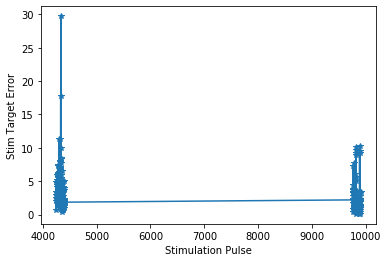

In [71]:
### plotting samples target errors
fig,ax = plt.subplots()
ax.plot(stim_samples_df.target_error,'*-')
ax.set_xlabel('Stimulation Pulse')
ax.set_ylabel('Stim Target Error')

As the jumps in the plot shows, LDLPFC has been stimulated at different sessions. We can chunk the samples.

[0, 150, 294]


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13d95ceb8>)

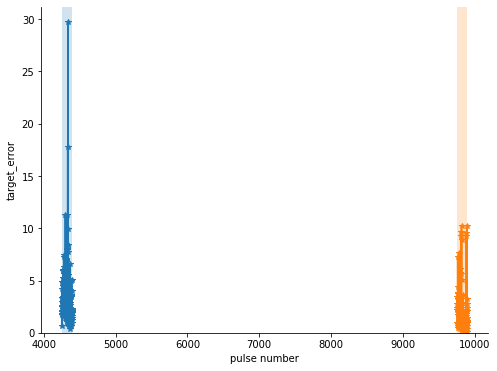

In [72]:
chunks = chunk_samples(stim_samples_df, thr=100)  
plot_chunks(chunks)

In [73]:
for c in chunks:
    print('chunk ',c,' number of stimulations: ', chunks[c].shape[0])

chunk  1  number of stimulations:  150
chunk  2  number of stimulations:  144


In [77]:
### chunk dataframe
chunks[1].head()

,sample_name,session_name,index,assoc_target,loc_x,loc_y,loc_z,m0n0,m0n1,m0n2,...,angular_error,twist_error,stim_power,date,time,creation_cause,crosshairs_driver,offset,comment,emg_channels
4250,Sample 464,Session 3,464,C_DMN,63.998,-54.106,63.142,0.311,-0.160,-0.937,...,2.768,11.051,(null),2018-08-10,10:08:06.596,TTL2,Snazzy Coil,0.0,(null),(null)
4251,Sample 465,Session 3,465,C_DMN,67.717,-52.013,59.855,0.279,-0.143,-0.950,...,2.401,10.491,(null),2018-08-10,10:08:11.616,TTL2,Snazzy Coil,0.0,(null),(null)
4252,Sample 466,Session 3,466,C_DMN,66.340,-53.730,59.140,0.284,-0.133,-0.949,...,3.640,11.104,(null),2018-08-10,10:08:15.649,TTL2,Snazzy Coil,0.0,(null),(null)
4253,Sample 467,Session 3,467,C_DMN,68.362,-51.734,58.109,0.295,-0.157,-0.943,...,3.253,10.523,(null),2018-08-10,10:08:18.666,TTL2,Snazzy Coil,0.0,(null),(null)
4254,Sample 468,Session 3,468,C_DMN,66.543,-53.215,59.324,0.290,-0.149,-0.945,...,3.186,10.692,(null),2018-08-10,10:08:21.698,TTL2,Snazzy Coil,0.0,(null),(null)


### plotting target error for the chunks

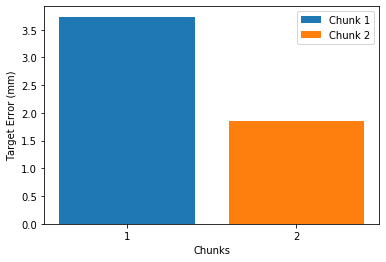

In [75]:
fig,ax = plt.subplots()
for c in chunks.keys():
    ax.bar(c,np.mean(chunks[c].target_error), label='Chunk %s'%c)

ax.set_xlabel('Chunks')
ax.set_ylabel('Target Error (mm)')
ax.set_xticks(list(chunks.keys()))
ax.legend()


Text(0, 0.5, 'Target Error (mm)')

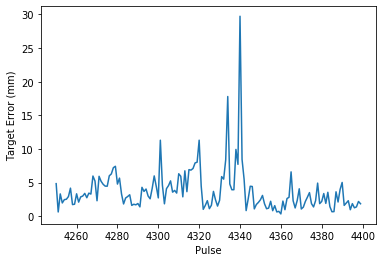

In [79]:
plt.plot(chunks[1].target_error)
plt.xlabel('Pulse')
plt.ylabel('Target Error (mm)')